In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score

In [3]:
fmnist = fetch_openml("Fashion-MNIST", data_home="data/fmnist", cache=True)
zipped_fmnist = list(zip(fmnist.data, fmnist.target))

In [42]:
# wybieram próbki
sample_size = [70000, 40000, 10000]
fmnist_random = {}

for size in sample_size:
    fmnist_random[size] = random.sample(zipped_fmnist, size)

In [88]:
pca_dim = [10, 50, 200]
x_pca = {} # x_pca[(sample_size, dimension)]
y_pca = {} # y[sample_size]

for dim in pca_dim:
    pca = PCA(dim)
    for size in sample_size:
        x, y = zip(*(fmnist_random[size]))
        x = np.asarray(x)
        y_pca[size] = np.asarray(y)
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        x_pca[size, dim] = pca.fit_transform(x_scaled)
        print(x_pca[(size,dim)].shape)

(70000, 10)
(40000, 10)
(10000, 10)
(70000, 50)
(40000, 50)
(10000, 50)
(70000, 200)
(40000, 200)
(10000, 200)


## Przykładowy wygląd

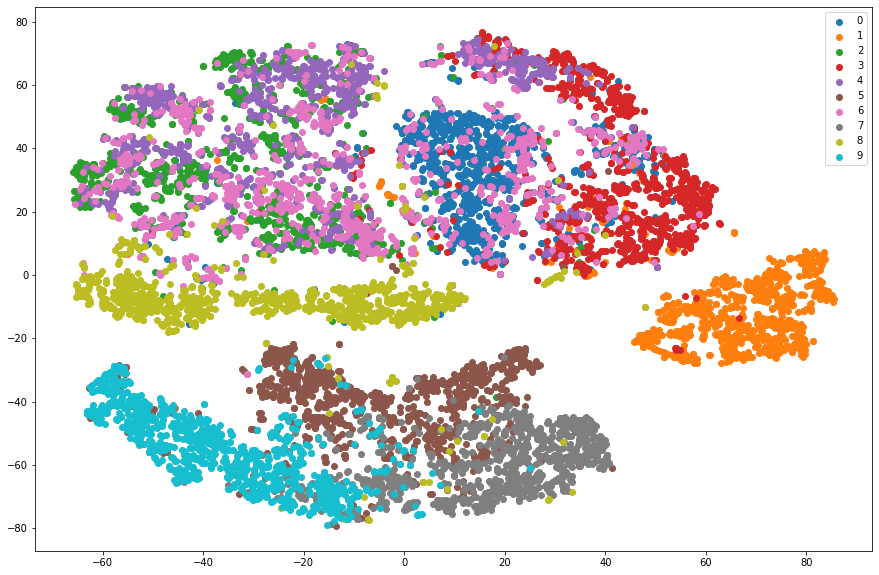

In [90]:
size = 10000
dim = 50

x_embedded = TSNE(n_components=2).fit_transform(x_pca[size, dim])
plt.figure(figsize=(15,10))

for c, ids in zip(mcolors.TABLEAU_COLORS, [str(i) for i in range(dim)]):
    plt.scatter(x_embedded[y_pca[size] == ids, 0], x_embedded[y_pca[size] == ids, 1], c=c, label=ids)
plt.legend()
plt.show()

## AdaBoost

In [79]:
for size, dim in x_pca.keys():
    x_train, x_test, y_train, y_test = train_test_split(x_pca[size, dim], y_pca[size], train_size=0.8)
    classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
    classifier.fit(x_train, y_train)
    print("SIZE = {}, DIMENSION = {}, SCORE = {}".format(size, dim, classifier.score(x_test, y_test)))
    

SIZE = 70000, DIMENSION = 10, SCORE = 0.5369285714285714
SIZE = 40000, DIMENSION = 10, SCORE = 0.474
SIZE = 10000, DIMENSION = 10, SCORE = 0.553
SIZE = 70000, DIMENSION = 50, SCORE = 0.5475714285714286
SIZE = 40000, DIMENSION = 50, SCORE = 0.4945
SIZE = 10000, DIMENSION = 50, SCORE = 0.4675
SIZE = 70000, DIMENSION = 200, SCORE = 0.5297142857142857
SIZE = 40000, DIMENSION = 200, SCORE = 0.51775
SIZE = 10000, DIMENSION = 200, SCORE = 0.457


### Na oryginalnym 

In [86]:
x, y = zip(*(zipped_fmnist))
x = np.asarray(x)
y = np.asarray(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.49892857142857144

## SVM